In [2]:
import pandas as pd
import hddm
import matplotlib.pyplot as plt
import numpy as np

# Load data
data_raw_m133_cyl = pd.read_csv("m133_cyl_pp.csv")
data_raw_m134_cyl = pd.read_csv("m134_cyl_pp.csv")
data_raw_m133_RDK = pd.read_csv("m133_dots_pp.csv")
data_raw_m134_RDK = pd.read_csv("m134_dots_pp.csv")
humans_all_data = hddm.load_csv('combined_blocks_humans-2.csv')

# Sort data based on stimulus displayed (RDK or SfM cylinder) and response mode (saccades or buttons)
humans_cylinder = humans_all_data[humans_all_data['stimulus_displayed'] == 'cylinder']
humans_dots = humans_all_data[humans_all_data['stimulus_displayed'] == 'dots']
humans_cylinder_saccades = humans_cylinder[humans_cylinder['response_mode'] == 'saccades']
humans_cylinder_buttons = humans_cylinder[humans_cylinder['response_mode'] == 'buttons']
humans_dots_saccades = humans_dots[humans_dots['response_mode'] == 'saccades']
humans_dots_buttons = humans_dots[humans_dots['response_mode'] == 'buttons']

# Make a copy 
data_raw_m133_cyl_copy = data_raw_m133_cyl  
data_raw_m134_cyl_copy = data_raw_m134_cyl
data_raw_m133_RDK_copy = data_raw_m133_RDK
data_raw_m134_RDK_copy = data_raw_m134_RDK

# Iterate over the rows of the dataframe to flip errors 
for index, row in data_raw_m133_cyl_copy.iterrows():
    
    # Check if the accuracy is 0
    if row['accuracy'] == 0:
        
        # Multiply the rt value by the constant
        data_raw_m133_cyl_copy.at[index, 'rt'] = row['rt'] * -1

        
for index, row in data_raw_m134_cyl_copy.iterrows():
    if row['accuracy'] == 0:
        data_raw_m134_cyl_copy.at[index, 'rt'] = row['rt'] * -1
    
for index, row in data_raw_m133_RDK_copy.iterrows():
    if row['accuracy'] == 0:
        data_raw_m133_RDK_copy.at[index, 'rt'] = row['rt'] * -1
        
for index, row in data_raw_m134_RDK_copy.iterrows():
    if row['accuracy'] == 0:
        data_raw_m134_RDK_copy.at[index, 'rt'] = row['rt'] * -1
    
    
# Repeat for humans 
for index, row in humans_cylinder_saccades.iterrows():
    if row['accuracy'] == 0:
        humans_cylinder_saccades.at[index, 'rt'] = row['rt'] * -1
    
for index, row in humans_cylinder_buttons.iterrows():
    if row['accuracy'] == 0:
        humans_cylinder_buttons.at[index, 'rt'] = row['rt'] * -1
        
for index, row in humans_dots_saccades.iterrows():
    if row['accuracy'] == 0:
        humans_dots_saccades.at[index, 'rt'] = row['rt'] * -1
        
for index, row in humans_dots_buttons.iterrows():
    if row['accuracy'] == 0:
        humans_dots_buttons.at[index, 'rt'] = row['rt'] * -1


In [3]:
humans_dots_buttons.drop(columns=["stimulus_displayed", "response_mode", "subj_idx"], inplace=True)
humans_dots_buttons["Paradigm"] = "Humans/hand"
humans_cylinder_saccades.drop(columns=["stimulus_displayed", "response_mode", "subj_idx"], inplace=True)
humans_cylinder_saccades["Paradigm"] = "Humans/saccades"
humans_dots_saccades.drop(columns=["stimulus_displayed", "response_mode", "subj_idx"], inplace=True)
humans_dots_saccades["Paradigm"] = "Humans/saccades"
humans_cylinder_buttons.drop(columns=["stimulus_displayed", "response_mode", "subj_idx"], inplace=True)
humans_cylinder_buttons["Paradigm"] = "Humans/hand"

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-3-6ec436550149>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  humans_dots_buttons["Paradigm"] = "Humans/hand"
<ipython-input-3-6ec436550149>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

In [4]:
data_raw_m133_cyl_copy.drop(columns="subj_idx", inplace=True)
data_raw_m133_cyl_copy["Paradigm"] = "m133/saccades"

data_raw_m134_cyl_copy.drop(columns="subj_idx", inplace=True)
data_raw_m134_cyl_copy["Paradigm"] = "m134/saccades"

data_raw_m133_RDK_copy.drop(columns="subj_idx", inplace=True)
data_raw_m133_RDK_copy["Paradigm"] = "m133/hand"

data_raw_m134_RDK_copy.drop(columns="subj_idx", inplace=True)
data_raw_m134_RDK_copy["Paradigm"] = "m134/hand"

In [5]:
total_cyl = pd.concat([humans_cylinder_saccades, humans_cylinder_buttons, data_raw_m133_cyl_copy, data_raw_m134_cyl_copy], ignore_index=True)
total_RDK = pd.concat([humans_dots_saccades, humans_dots_buttons, data_raw_m133_RDK_copy, data_raw_m134_RDK_copy], ignore_index=True)

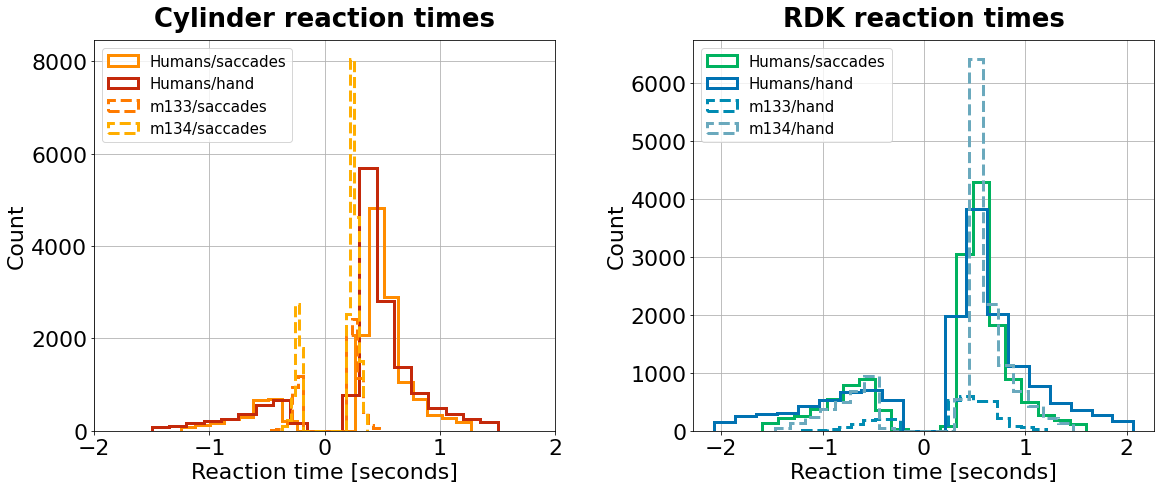

In [10]:
# Plotting the RT distributions 
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(19, 7)

# Generate a range of evenly spaced values from 0 to 1
values = np.linspace(0, 1, 12)

# Define a colormap with grey-ish colors
# colors = plt.cm.get_cmap('PiYG')(values)
# colors = colors[(0, 2, 9, 11), :]

# colors = ["#c4290a", "#FF8C00", "#0072B2", "#00b25f"]
# colors_m = ["#ff7b00", "#ffae00", "#008bb2", "#6aa9bd"]

color_cyl = ["#FF8C00", "#c4290a", "#ff7b00", "#ffae00"]
color_RDK = ["#00b25f", "#0072B2", "#008bb2", "#6aa9bd"]
linestyle_list = ["solid", "solid", "dashed", "dashed"]

count = 0
for i, subj_data in total_cyl.groupby('Paradigm'):
    
    subj_data.rt.hist(bins=20, histtype='step', ax=axs[0], linewidth=3,linestyle=linestyle_list[count], color=color_cyl[count])
    count += 1
    
axs[0].legend(["Humans/saccades", "Humans/hand", "m133/saccades", "m134/saccades"], loc="upper left", fontsize=15)    

count = 0   
for i, subj_data in total_RDK.groupby('Paradigm'):
    
    subj_data.rt.hist(bins=20, histtype='step', ax=axs[1], linewidth=3,linestyle=linestyle_list[count], color=color_RDK[count])
    count += 1

axs[1].legend(["Humans/saccades", "Humans/hand", "m133/hand", "m134/hand"], loc="upper left", fontsize=15)    

axs[0].set_title("Cylinder reaction times", fontsize=26, fontweight = "bold", y=1.02)
axs[1].set_title("RDK reaction times", fontsize=26, fontweight = "bold", y=1.02)

axs[0].set_xlim([-2, 2])
axs[0].set_xlabel("Reaction time [seconds]")
axs[1].set_xlabel("Reaction time [seconds]")

axs[0].set_ylabel("Count")
axs[1].set_ylabel("Count")

fig.subplots_adjust(top=0.9, hspace=.3, wspace=.3)

fig.savefig("Full_rt.svg")